In [3]:
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt
import pprint
from networkx.readwrite import json_graph

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Week-8-part-1/main/data/data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [7]:
df.head(2)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by,First_author_Country
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN,Canada
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN,Italy


In [6]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)
     

In [8]:
df['First_author_Country']

0             Canada
1              Italy
2             Serbia
3              Japan
4              India
           ...      
565           Canada
566    United States
567      South Korea
568    United States
569           Canada
Name: First_author_Country, Length: 561, dtype: object

<AxesSubplot:>

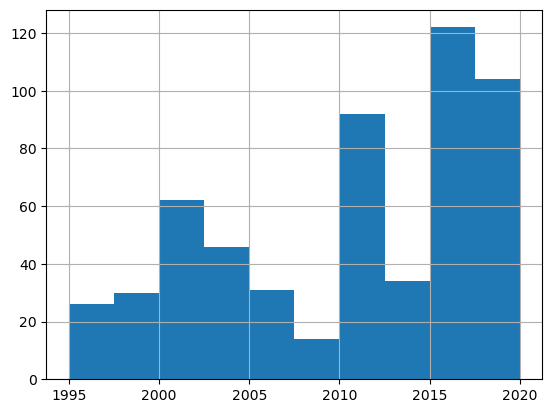

In [9]:
df.Year.hist()

In [10]:
df["Source title"].value_counts().reset_index()

,index,Source title
0,Proc. of the IADIS Int. Conf. Computer Graphic...,55
1,MCCSIS 2018 - Multi Conference on Computer Sci...,53
2,Proceedings of the International Conferences o...,49
3,Proceedings of the IEEE Visualization Conference,48
4,Proceedings of the IEEE Symposium on Informati...,41
5,Lecture Notes in Artificial Intelligence (Subs...,35
6,International Multidisciplinary Scientific Geo...,32
7,Proceedings of the ACM Symposium on Applied Co...,32
8,International Journal of Human Computer Studies,29
9,IS and T International Symposium on Electronic...,25


In [11]:
nodes = df['EID'].values
df = df.fillna(0)

In [12]:
df['Year'].max()

2020

In [13]:
G = nx.Graph()

In [14]:
nodes = []
for row in df.iterrows():
  nodes.append((row[1]['EID'],{
      "Title": row[1]['Title'],
      "Year" : row[1]['Year'],
      "Citations" : row[1]['Cited by'],
      "Publisher" : row[1]['Publisher'],
  }))

In [15]:
len(nodes)

561

In [16]:
nodes[0]

('2-s2.0-85086464158',
 {'Title': 'Virtual reality applications for the built environment: Research trends and opportunities',
  'Year': 2020,
  'Citations': 0.0,
  'Publisher': 'Elsevier B.V.'})

In [17]:
G.add_nodes_from(nodes)

In [18]:
edges = []
for row in df.iterrows():
  current_paper = row[1]['EID']
  if ";" in row[1]['Author(s) ID']: 
    authors = row[1]['Author(s) ID'][:-1].split(";")
    for author in authors:
      papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
      if len(papers)>0:
        for paper in papers:
          if paper != current_paper:
            edges.append((current_paper,paper))
  else:
    continue

In [19]:
G.add_edges_from(edges)

In [21]:
#pos = nx.drawing.circular_layout(G)
pos = nx.spring_layout(G)

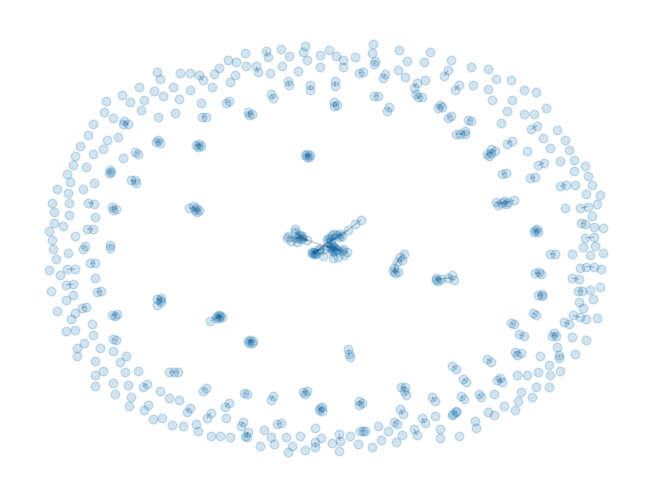

In [22]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [23]:
from networkx.readwrite import json_graph

In [24]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

In [25]:
nx.write_gml(G,"network.gml")